# AMATH 422/522 Python Lab Manual, Part 3 

This tutorial draws heavily on sources including:

* The Allen Institute's superb Python Bootcamp, at https://github.com/AllenInstitute/SWDB_2019/tree/master/PythonBootcamp

I strongly encourage you to visit the Allen's Python Bootcamp for much more -- including a general introduction to Python's fundamental data structures and objects!  Here we will focus on getting going fast with numerical computing.

It is also draws on and translates much of the Lab Manual for our text -- Dynamic Models in Biology, by Ellner and Guckenheimer -- into Python.  That Lab Manual is available (in MATLAB and R) here.  Credits for this are:  *These notes for computer labs accompany our textbook {Dynamic Models in Biology} (Princeton University
Press 2006). They are based in part on course materials 
by former TAs Colleen Webb, Jonathan Rowell and Daniel Fink at Cornell, 
Professors Lou Gross (University of Tennessee) and Paul Fackler (NC State University), and 
on the book \textit{Getting Started with Matlab} by Rudra Pratap (Oxford University Press).* 



In [1]:
import matplotlib.pylab as plt   # That gives plotting, and the next line makes plots appear inline in notebook
%matplotlib inline  
import numpy as np  # That gives numerical arrays and tools for manipulating them

import scipy.optimize as opt
import scipy.linalg as la

### Initializing a random number generator

First we need to initialize a random number GENERATOR (rng).  We do this by calling `default_rng` from the submodule (I think of this as a sub-package, or subfolder of functions) `random` within numpy.  

* Note that we pass no argument.  This will draw a "high entropy" (unpredictable) seed from the operating system.


In [2]:
rng = np.random.default_rng()

Now we're ready to go!  Let's generate an 1-D array of uniformly distributed random variables in the range [0,1), of length 10.  We use syntax `rng.uniform(left_limit,right_limit,length)`

In [11]:
a = rng.uniform(0,1,10)
print(a)

[0.10372777 0.2679119  0.50524445 0.15817771 0.04792612 0.18318688
 0.23770867 0.49542536 0.12099009 0.5279429 ]


Similar syntax for a 2-D array, or a higher-dimensional array as well!  We swap out the length with the size of the array, in round brackets (formally that is called a tuple in python).


In [12]:
a = rng.uniform(0,1,(3,3))
print(a)

[[0.95605277 0.65401705 0.36732555]
 [0.68583518 0.68937156 0.47398517]
 [0.76273003 0.21204831 0.47109234]]


We are creating numpy arrays, as before and as expected!  We can confirm that using:

In [13]:
type(a)

numpy.ndarray

Similar syntax for a gaussian (normal) distribution, with mean mu, standard deviation sigma:  `rng.normal(mu,sigma,size)`

In [14]:
a = rng.normal(0,1,(3,3))
print(a)

[[-0.15309553  0.80540483 -0.38107906]
 [-1.76572195  0.35910612 -0.60555412]
 [ 2.42867494 -0.15994393  0.6232527 ]]


### A note on seeds  
Let's do this process again

In [15]:
rng = np.random.default_rng()
a = rng.uniform(0,1,5)
print(a)

[0.62704049 0.71297718 0.38618287 0.14403751 0.69857764]


And again, this time asking for two random arrays as well

In [16]:
rng = np.random.default_rng()
a = rng.uniform(0,1,5)
b = rng.uniform(0,1,5)
print(a)
print(b)

[0.07660326 0.64906561 0.70020883 0.43065947 0.23322174]
[0.23305083 0.13329052 0.64221835 0.78872563 0.61605848]


Each time above get something different, as expected:  a new seed is drawn from the operating system when we make the rng, and then it keeps advancing as we call it.

* But, what if we want to re-use a random sequence?  We specify the seed when making the rng, as an integer -- creating reproducible behavior.  Depending on your objectives, this can be good, or very bad!

In [17]:
rng = np.random.default_rng(124)
a = rng.uniform(0,1,5)
print(a)

[0.78525311 0.78585936 0.96913602 0.74805977 0.65555081]


In [19]:
rng = np.random.default_rng(124)
a = rng.uniform(0,1,5)
print(a)
b = rng.uniform(0,1,5)
print(b)
rng = np.random.default_rng(124)
c = rng.uniform(0,1,5)
print(c)

[0.78525311 0.78585936 0.96913602 0.74805977 0.65555081]
[0.93888454 0.17861445 0.58864721 0.44279917 0.34884712]
[0.78525311 0.78585936 0.96913602 0.74805977 0.65555081]


There are tons more distributions that can be sampled using our rng.  Check out the documentation ... https://numpy.org/doc/stable/reference/random/generator.html

### Making and plotting a histogram of random variables

In [20]:
#First generate a fresh array of uniform random samples
rng = np.random.default_rng()
a = rng.uniform(0,1,50)

Now we'll use the np.histogram command to bin these into `num_bins` bins.  This returns counts, an array of `num_bins` counts in each bin, and `bin_edges`, the edges of the bins, including the final right endpoint (hence this array is one longer).

In [21]:
num_bins=10  
counts, bin_edges = np.histogram(a,num_bins)

print(counts)
print(counts.shape)
print(bin_edges)
print(bin_edges.shape)

[6 9 4 6 2 3 6 3 3 8]
(10,)
[0.01591758 0.11165625 0.20739493 0.3031336  0.39887228 0.49461095
 0.59034963 0.6860883  0.78182697 0.87756565 0.97330432]
(11,)


Let's plot this as a bar plot, making the resulting histogram

Text(0.5, 0, 'bin centers')

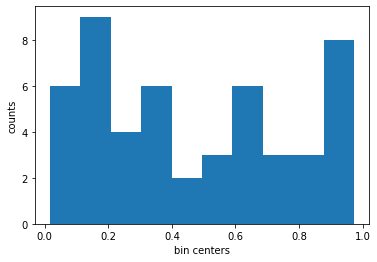

In [22]:
bin_centers=(bin_edges[0:-1]+bin_edges[1:])/2
bin_width=bin_edges[1]-bin_edges[0]

plt.bar(bin_centers,counts,width=bin_width)
plt.ylabel('counts')
plt.xlabel('bin centers')

To turn this into a plot of proabilties of falling in to a certain bin, we need to divide by the total number of samples 

Text(0.5, 0, 'bin centers')

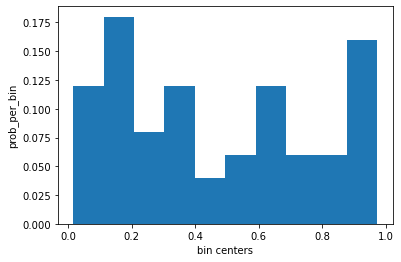

In [23]:
num_samples=a.size
prob_per_bin=counts/num_samples

plt.bar(bin_centers,prob_per_bin,width=bin_width)
plt.ylabel('prob_per_bin')
plt.xlabel('bin centers')

To turn this into a plot of proabilty **densities** -- so that it would make sense to integrate between two values on the horizontal axis -- we need to divide by the bin width.  We allow for the possibilitiy that the bin widths are unequal in the code below: 

Text(0.5, 0, 'bin centers')

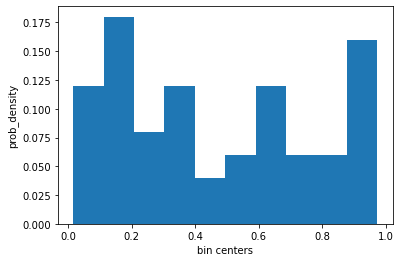

In [24]:
bin_width_arr=bin_edges[1:]-bin_edges[0:-1]
density_calc=prob_per_bin/bin_width_arr

plt.bar(bin_centers,prob_per_bin,width=bin_width)
plt.ylabel('prob_density')
plt.xlabel('bin centers')

Now that we've reviewed all the underlying steps (not a bad practice, as it's easy to get confused as to what count-like quanties are what) -- we note that Numpy provides a one-liner that computes the corresponding densities as well!  Hit `help(np.histogram)` as usual for more.

In [25]:
densities, bin_edges = np.histogram(a,num_bins,density=True)

print(densities)
print('confirming that these match the values calculated in steps above')
print(density_calc)



[1.25341196 1.88011794 0.83560797 1.25341196 0.41780399 0.62670598
 1.25341196 0.62670598 0.62670598 1.67121595]
confirming that these match the values calculated in steps above
[1.25341196 1.88011794 0.83560797 1.25341196 0.41780399 0.62670598
 1.25341196 0.62670598 0.62670598 1.67121595]


### Legacy random number generators.  You may run into older syntax as well, like the below.

This is provided for completeness.  Please see https://numpy.org/doc/stable/reference/random/legacy.html#numpy.random.RandomState for more. 

Unless you have to (e.g. adapting code for your project from that published elsewhere), please use the newer code above.

Generate an 1-D array of uniformly distributed random variables in the range [0,1), of the assigned length.

In [177]:
np.random.rand(5)

array([0.57131913, 0.63317908, 0.37565772, 0.40288285, 0.08334177])

Similar syntax for a 2-D array, or a higher-dimensional array as well!


In [178]:
np.random.rand(3,3)

array([[0.25054862, 0.50283825, 0.83386919],
       [0.63288733, 0.42805103, 0.22210692],
       [0.25414905, 0.97463858, 0.63102028]])

And similar syntax usig `randn` for normally (gaussian) distributed random variables with mean 0 and variance 1.

In [179]:
np.random.randn(5)

array([ 0.1796961 , -1.14711208, -0.64066535,  1.04748149,  0.70318756])